## Hierarichal Clustring Implementation

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets 


In [4]:
iris = datasets.load_iris() 

In [5]:
iris_data = pd.DataFrame(data=iris.data)

In [6]:
iris_data.columns = iris.feature_names

In [7]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
## Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [9]:
X_scaled = scaler.fit_transform(iris_data)

In [10]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [11]:
X_scaled.shape

(150, 4)

In [12]:
## Apply PCA - Reducing to 2 dimensions form 4 dimensions


In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [14]:
pca

PCA(n_components=2)

In [15]:
pca_scaled = pca.fit_transform(X_scaled)

In [16]:
pca_scaled.shape

(150, 2)

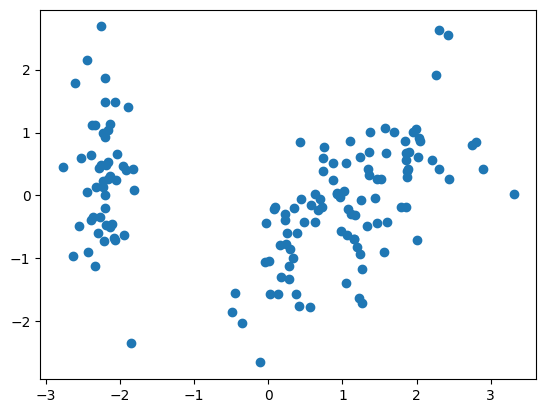

In [17]:
plt.scatter(pca_scaled[:,0] , pca_scaled[:,1])

Text(0.5, 1.0, 'Dendogram ')

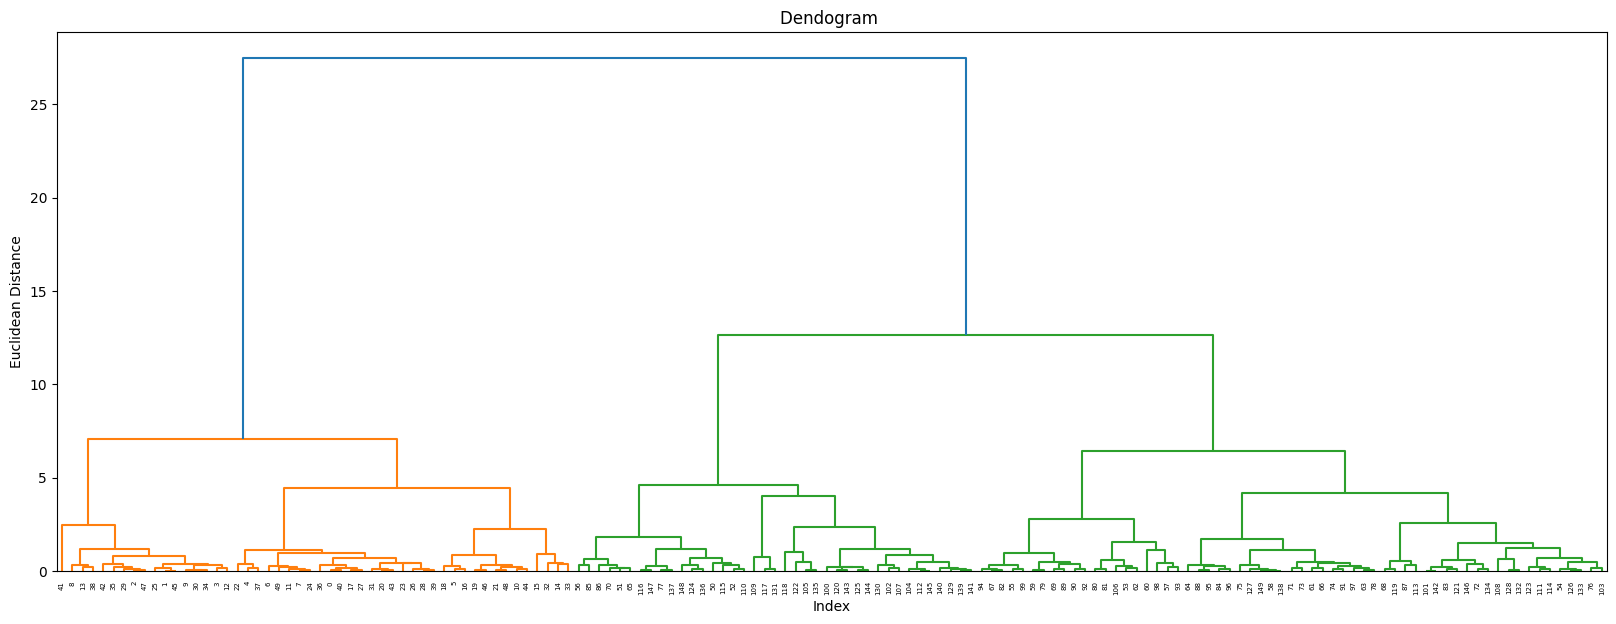

In [19]:
## Agglomerative Clustring 
## To Construct Dendogram
import scipy.cluster.hierarchy as sc
# plot The Dendogram
plt.figure(figsize=(20, 7))
plt.title('Dendogram')


## Create Dendogram
sc.dendrogram(sc.linkage(pca_scaled,method = 'ward'))
plt.xlabel('Index')
plt.ylabel('Euclidean Distance')
plt.title('Dendogram ')



In [22]:
from sklearn.cluster import AgglomerativeClustering
# Fit Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [23]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

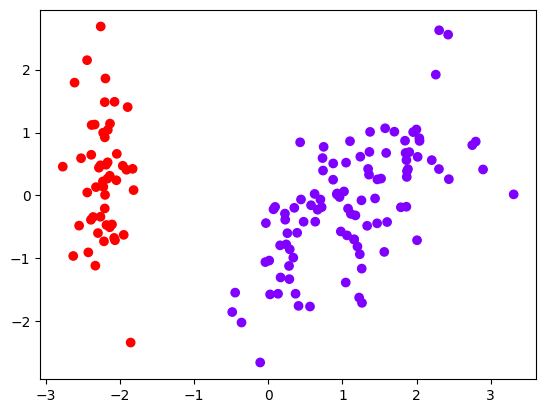

In [24]:
plt.scatter(pca_scaled[:,0] , pca_scaled[:,1], c=cluster.labels_, cmap='rainbow')

In [25]:
## silhouette score
from sklearn.metrics import silhouette_score


In [27]:
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=k,metric='euclidean',linkage='ward')
    agglo.fit(X_scaled)
    score = silhouette_score(X_scaled, agglo.labels_)
    silhouette_coefficients.append(score)

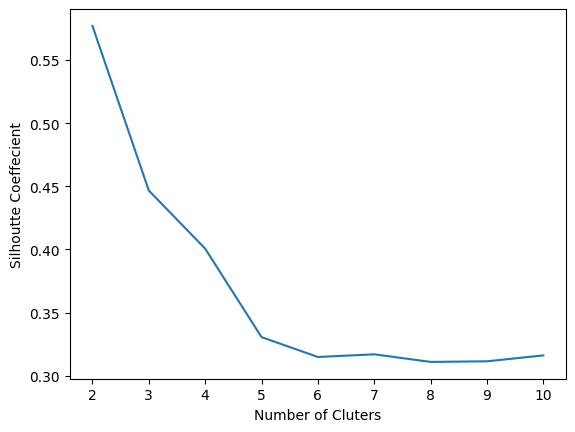

In [28]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()